In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from matplotlib import pyplot as plt

In [ ]:
df1=pd.read_csv('/content/LEAD_finalWithBfill.csv');
print(df1.dtypes)
print(df1)

Date                         object
LME Lead Cash-Settlement    float64
dtype: object
            Date  LME Lead Cash-Settlement
0     01-01-2008                    2580.0
1     02-01-2008                    2580.0
2     03-01-2008                    2593.0
3     04-01-2008                    2665.0
4     05-01-2008                    2601.0
...          ...                       ...
4884  16-05-2021                    2181.5
4885  17-05-2021                    2181.5
4886  18-05-2021                    2213.5
4887  19-05-2021                    2202.0
4888  20-05-2021                    2202.5

[4889 rows x 2 columns]


In [ ]:
df2=pd.read_csv('/content/GOLD_finalWithBfill.csv');
df2['Gold'] = df2['Gold'].astype(float)
print(df2.dtypes)
print(df2)

Date     object
Gold    float64
dtype: object
            Date     Gold
0     01-01-2008  19750.0
1     02-01-2008  19750.0
2     03-01-2008  19750.0
3     04-01-2008  19750.0
4     05-01-2008  19750.0
...          ...      ...
4884  16-05-2021  48120.0
4885  17-05-2021  48120.0
4886  18-05-2021  48300.0
4887  19-05-2021  48140.0
4888  20-05-2021  48500.0

[4889 rows x 2 columns]


In [ ]:
df3=pd.read_csv('/content/USDINR_final_withoutNAN.csv');
print(df3.dtypes)
print(df3)


Date      object
Close    float64
dtype: object
            Date      Close
0     01-01-2008  39.244999
1     02-01-2008  39.375000
2     03-01-2008  39.353001
3     04-01-2008  39.095001
4     05-01-2008  39.095001
...          ...        ...
4884  16-05-2021  73.444901
4885  17-05-2021  73.278900
4886  18-05-2021  73.269699
4887  19-05-2021  73.128197
4888  20-05-2021  73.222900

[4889 rows x 2 columns]


In [ ]:
print(df3['Close'][91])

39.889


In [ ]:
data = pd.DataFrame(df1, columns=['LME Lead Cash-Settlement'])
data=pd.concat([data, df2['Gold']], axis=1,ignore_index=True)
data=pd.concat([data, df3['Close']], axis=1,ignore_index=True)
data.columns = ['LME Lead Cash-Settlement', 'Gold','Close']
print(data.dtypes)
print(data)

LME Lead Cash-Settlement    float64
Gold                        float64
Close                       float64
dtype: object
      LME Lead Cash-Settlement     Gold      Close
0                       2580.0  19750.0  39.244999
1                       2580.0  19750.0  39.375000
2                       2593.0  19750.0  39.353001
3                       2665.0  19750.0  39.095001
4                       2601.0  19750.0  39.095001
...                        ...      ...        ...
4884                    2181.5  48120.0  73.444901
4885                    2181.5  48120.0  73.278900
4886                    2213.5  48300.0  73.269699
4887                    2202.0  48140.0  73.128197
4888                    2202.5  48500.0  73.222900

[4889 rows x 3 columns]


In [ ]:
data.to_csv('data.csv')

In [ ]:
All_dates = pd.to_datetime(df1['Date'])
print(All_dates.dtype)
print(All_dates)

datetime64[ns]
0      2008-01-01
1      2008-02-01
2      2008-03-01
3      2008-04-01
4      2008-05-01
          ...    
4884   2021-05-16
4885   2021-05-17
4886   2021-05-18
4887   2021-05-19
4888   2021-05-20
Name: Date, Length: 4889, dtype: datetime64[ns]


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(data)
data_scaled = scaler.transform(data)#data_scaled is a list
print(data)
print(data_scaled)

      LME Lead Cash-Settlement     Gold      Close
0                       2580.0  19750.0  39.244999
1                       2580.0  19750.0  39.375000
2                       2593.0  19750.0  39.353001
3                       2665.0  19750.0  39.095001
4                       2601.0  19750.0  39.095001
...                        ...      ...        ...
4884                    2181.5  48120.0  73.444901
4885                    2181.5  48120.0  73.278900
4886                    2213.5  48300.0  73.269699
4887                    2202.0  48140.0  73.128197
4888                    2202.5  48500.0  73.222900

[4889 rows x 3 columns]
[[0.71624184 0.07112861 0.00389858]
 [0.71624184 0.07112861 0.00727743]
 [0.72171898 0.07112861 0.00670565]
 ...
 [0.56182852 0.82047244 0.88823129]
 [0.55698336 0.81627297 0.88455353]
 [0.55719402 0.82572178 0.88701494]]


In [ ]:
data_scaled.shape

(4889, 3)

In [ ]:
training_size=int(len(data)*0.93)
test_size=len(data)-training_size
#train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]
training_size,test_size

(4546, 343)

In [ ]:
data_scaled_list = data_scaled.tolist()
type(data_scaled_list)
print(len(data_scaled_list[0]))

3


In [ ]:
#Making test data
testX=[]
testY=[]
n_future=90
n_past=20
for i in range(len(data_scaled_list)-test_size+n_past, len(data_scaled_list )-n_future):
    temp=[]
    testX.append(data_scaled_list[i - n_past:i])
    for j in range(i,i+n_future):
      temp.append(data_scaled_list[j][0])
    
    testY.append(temp)

In [ ]:
testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

#(number of train/test example, lookback_days/predict_days, number of features)

testX shape == (233, 20, 3).
testY shape == (233, 90).


In [ ]:
print(testX)
print(testY)

[[[0.36212345 0.82572178 0.96933071]
  [0.35306509 0.81417323 0.96933071]
  [0.35306509 0.81417323 0.96933071]
  ...
  [0.38045081 0.85616798 0.94931246]
  [0.38276806 0.86272966 0.95139693]
  [0.3711818  0.87401575 0.95269655]]

 [[0.35306509 0.81417323 0.96933071]
  [0.35306509 0.81417323 0.96933071]
  [0.35306509 0.81417323 0.95807153]
  ...
  [0.38276806 0.86272966 0.95139693]
  [0.3711818  0.87401575 0.95269655]
  [0.37307773 0.85485564 0.94502672]]

 [[0.35306509 0.81417323 0.96933071]
  [0.35306509 0.81417323 0.95807153]
  [0.37097114 0.8183727  0.9586224 ]
  ...
  [0.3711818  0.87401575 0.95269655]
  [0.37307773 0.85485564 0.94502672]
  [0.36907521 0.86404199 0.92595194]]

 ...

 [[0.4758795  0.81338583 0.88218588]
  [0.47735412 0.82073491 0.87963085]
  [0.48219928 0.82939633 0.87963085]
  ...
  [0.51801138 0.79606299 0.87367129]
  [0.51801138 0.79606299 0.87069013]
  [0.51885401 0.7976378  0.87183111]]

 [[0.47735412 0.82073491 0.87963085]
  [0.48219928 0.82939633 0.87963085]


In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 90  # Number of days we want to predict into the future
n_past = 20    # Number of past days we want to use to predict the future

In [ ]:
for i in range(n_past, training_size - n_future +1):
    temp=[]
    trainX.append(data_scaled_list[i - n_past:i])
    for j in range(i,i+n_future):
      temp.append(data_scaled_list[j][0])
    
    trainY.append(temp)
    
  

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

#(number of train/test example, lookback_days/predict_days, number of features)

trainX shape == (4437, 20, 3).
trainY shape == (4437, 90).


In [ ]:
print(trainX)
print(trainY)

[[[0.71624184 0.07112861 0.00389858]
  [0.71624184 0.07112861 0.00727743]
  [0.72171898 0.07112861 0.00670565]
  ...
  [0.70360228 0.07112861 0.00491225]
  [0.68822414 0.07112861 0.00491225]
  [0.68822414 0.07112861 0.00491225]]

 [[0.71624184 0.07112861 0.00727743]
  [0.72171898 0.07112861 0.00670565]
  [0.75205393 0.07112861 0.        ]
  ...
  [0.68822414 0.07112861 0.00491225]
  [0.68822414 0.07112861 0.00491225]
  [0.68822414 0.07112861 0.00990256]]

 [[0.72171898 0.07112861 0.00670565]
  [0.75205393 0.07112861 0.        ]
  [0.72508953 0.07112861 0.        ]
  ...
  [0.68822414 0.07112861 0.00491225]
  [0.68822414 0.07112861 0.00990256]
  [0.67410996 0.07112861 0.00558804]]

 ...

 [[0.42174005 0.80708661 0.85808969]
  [0.41457763 0.84278215 0.85808969]
  [0.41457763 0.84278215 0.85808969]
  ...
  [0.40846851 0.77244094 0.90709032]
  [0.41268169 0.7648294  0.91776473]
  [0.39309037 0.77139108 0.91254066]]

 [[0.41457763 0.84278215 0.85808969]
  [0.41457763 0.84278215 0.85808969]


In [ ]:
type(trainY)

numpy.ndarray

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(20,3)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(90))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model=Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
regressor =Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
from keras import optimizers

optimizer = optimizers.Adam(clipvalue=0.5)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 20, 50)            10800     
_________________________________________________________________
lstm_41 (LSTM)               (None, 20, 50)            20200     
_________________________________________________________________
lstm_42 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 90)                4590      
Total params: 55,790
Trainable params: 55,790
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

In [ ]:
model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=256,verbose=1)

Epoch 1/100
18/18 [==============================] - 7s 161ms/step - loss: 0.2145 - val_loss: 0.0442
Epoch 2/100
18/18 [==============================] - 2s 94ms/step - loss: 0.0659 - val_loss: 0.0069
Epoch 3/100
18/18 [==============================] - 2s 96ms/step - loss: 0.0285 - val_loss: 0.0028
Epoch 4/100
18/18 [==============================] - 2s 96ms/step - loss: 0.0205 - val_loss: 0.0024
Epoch 5/100
18/18 [==============================] - 2s 94ms/step - loss: 0.0180 - val_loss: 0.0053
Epoch 6/100
18/18 [==============================] - 2s 95ms/step - loss: 0.0162 - val_loss: 0.0084
Epoch 7/100
18/18 [==============================] - 2s 96ms/step - loss: 0.0154 - val_loss: 0.0039
Epoch 8/100
18/18 [==============================] - 2s 95ms/step - loss: 0.0143 - val_loss: 0.0089
Epoch 9/100
18/18 [==============================] - 2s 96ms/step - loss: 0.0134 - val_loss: 0.0109
Epoch 10/100
18/18 [==============================] - 2s 94ms/step - loss: 0.0127 - val_loss: 0.011

In [ ]:
forecast = model.predict(testX) #forecast 

In [ ]:
forecast.shape

(233, 90)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(testY,forecast))

0.1034973105467132

In [ ]:
forecast[0].shape

(90,)

In [ ]:
element=forecast[0]
element= np. reshape(element, (element.shape[0], 1))
print(element.shape)

(90, 1)


In [ ]:
forecast_copies = np.repeat(element, 3, axis=1)
forecast_copies.shape

(90, 3)

In [ ]:
y_pred_future = scaler.inverse_transform(forecast_copies)

In [ ]:
#take 1st val of y_pred, then visualise results of some test set series samples.
#print(y_pred_future)
print(y_pred_future.shape)
#print(type(y_pred_future))

(90, 3)


In [ ]:
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)
print(y_pred.shape)


(90,)


In [ ]:
print(data)
print(type(data))
print(data.shape)

      LME Lead Cash-Settlement     Gold      Close
0                       2580.0  19750.0  39.244999
1                       2580.0  19750.0  39.375000
2                       2593.0  19750.0  39.353001
3                       2665.0  19750.0  39.095001
4                       2601.0  19750.0  39.095001
...                        ...      ...        ...
4884                    2181.5  48120.0  73.444901
4885                    2181.5  48120.0  73.278900
4886                    2213.5  48300.0  73.269699
4887                    2202.0  48140.0  73.128197
4888                    2202.5  48500.0  73.222900

[4889 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
(4889, 3)


In [ ]:
dataLead=data['LME Lead Cash-Settlement']

In [ ]:
test_size

343

In [ ]:
dataLead_list = dataLead.values.tolist()
print(dataLead_list)

[2580.0, 2580.0, 2593.0, 2665.0, 2601.0, 2601.0, 2601.0, 2580.5, 2630.0, 2525.5, 2551.0, 2640.0, 2640.0, 2640.0, 2680.0, 2610.0, 2610.0, 2550.0, 2513.5, 2513.5, 2513.5, 2480.0, 2540.5, 2579.5, 2650.5, 2586.5, 2586.5, 2586.5, 2730.0, 2741.0, 2741.5, 2845.0, 2865.0, 2865.0, 2865.0, 2770.0, 2800.0, 2786.0, 2880.0, 3012.0, 3012.0, 3012.0, 3032.0, 3020.0, 3071.0, 3045.0, 3020.0, 3020.0, 3020.0, 3110.0, 3253.5, 3253.5, 3253.5, 3253.5, 3253.5, 3253.5, 3253.5, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0, 1802.0,

In [ ]:
dataLead_list = dataLead_list[-test_size:]
print(dataLead_list)
print(len(dataLead_list))

[1739.5, 1718.0, 1718.0, 1718.0, 1760.5, 1775.5, 1796.5, 1777.5, 1763.5, 1763.5, 1763.5, 1744.0, 1742.5, 1775.5, 1778.0, 1783.0, 1783.0, 1783.0, 1788.5, 1761.0, 1765.5, 1756.0, 1781.0, 1781.0, 1781.0, 1779.0, 1819.5, 1817.5, 1842.0, 1858.0, 1858.0, 1858.0, 1839.5, 1836.0, 1824.0, 1811.0, 1805.0, 1805.0, 1805.0, 1814.0, 1800.5, 1794.5, 1808.0, 1801.0, 1801.0, 1801.0, 1835.0, 1847.0, 1841.5, 1843.0, 1866.5, 1866.5, 1866.5, 1834.0, 1889.0, 1913.0, 1921.0, 1880.0, 1880.0, 1880.0, 1901.0, 1934.0, 1932.0, 1946.0, 1956.5, 1956.5, 1956.5, 1964.0, 1994.0, 1964.0, 1965.0, 1960.0, 1960.0, 1960.0, 1984.5, 1969.0, 1954.0, 1976.5, 1984.0, 1984.0, 1984.0, 1984.0, 1951.0, 1912.0, 1940.0, 1961.5, 1961.5, 1961.5, 1925.0, 1888.0, 1859.0, 1869.0, 1873.5, 1873.5, 1873.5, 1909.5, 1883.5, 1851.0, 1889.0, 1871.5, 1871.5, 1871.5, 1873.0, 1851.5, 1856.0, 1815.0, 1805.0, 1805.0, 1805.0, 1821.0, 1801.0, 1809.5, 1763.0, 1744.5, 1744.5, 1744.5, 1759.0, 1777.0, 1779.0, 1779.5, 1823.5, 1823.5, 1823.5, 1826.5, 1771.5,

In [ ]:
#Making test data
testX_unscaled=[]
testY_unscaled=[]
n_future=90
n_past=20
for i in range(len(dataLead_list)-n_future-n_past):
    temp=[]
    testX_unscaled.append(dataLead_list[i:i+n_past])
    for j in range(i+n_past,i+n_past+n_future):
      temp.append(dataLead_list[j])
    testY_unscaled.append(temp)

In [ ]:
testX_unscaled= np.array(testX_unscaled)
testY_unscaled= np.array(testY_unscaled)
print(testX_unscaled)
print(testX_unscaled.shape)
print(type(testX_unscaled))
print(testY_unscaled)
print(testY_unscaled.shape)
print(type(testY_unscaled))

[[1739.5 1718.  1718.  ... 1783.  1788.5 1761. ]
 [1718.  1718.  1718.  ... 1788.5 1761.  1765.5]
 [1718.  1718.  1760.5 ... 1761.  1765.5 1756. ]
 ...
 [2009.5 2013.  2024.5 ... 2109.5 2109.5 2111.5]
 [2013.  2024.5 2024.5 ... 2109.5 2111.5 2097. ]
 [2024.5 2024.5 2024.5 ... 2111.5 2097.  2132. ]]
(233, 20)
<class 'numpy.ndarray'>
[[1765.5 1756.  1781.  ... 1805.  1805.  1821. ]
 [1756.  1781.  1781.  ... 1805.  1821.  1801. ]
 [1781.  1781.  1781.  ... 1821.  1801.  1809.5]
 ...
 [2097.  2132.  2122.  ... 2181.5 2181.5 2181.5]
 [2132.  2122.  2152.  ... 2181.5 2181.5 2213.5]
 [2122.  2152.  2152.  ... 2181.5 2213.5 2202. ]]
(233, 90)
<class 'numpy.ndarray'>


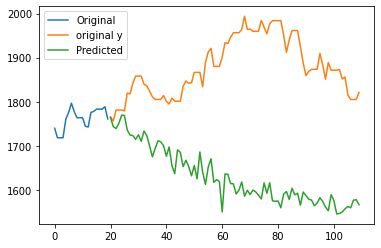

In [ ]:
#testX_unscaled[0] - original x test series
#testY_unscaled[0] - original y value
#y_pred - prediction
#on x axis: 20+90 = 110 days

x_axis=np.array([])
for i in range(110):
  x_axis=np.append(x_axis, i)

plt.plot(x_axis[0:20],testX_unscaled[0])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(x_axis[20:110],testY_unscaled[0])
plt.plot(x_axis[20:110],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()


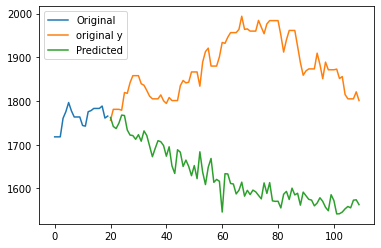

In [ ]:
#forecast[1]
test_num=1

element=forecast[test_num]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 3, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)


plt.plot(x_axis[0:20],testX_unscaled[test_num])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(x_axis[20:110],testY_unscaled[test_num])
plt.plot(x_axis[20:110],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

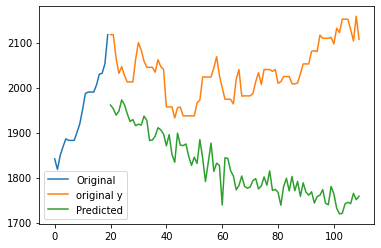

In [ ]:
test_num=150

element=forecast[test_num]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 3, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)


plt.plot(x_axis[0:20],testX_unscaled[test_num])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(x_axis[20:110],testY_unscaled[test_num])
plt.plot(x_axis[20:110],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

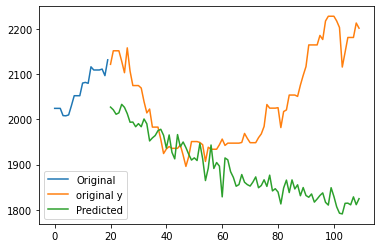

In [ ]:
test_num=232

element=forecast[test_num]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 3, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)


plt.plot(x_axis[0:20],testX_unscaled[test_num])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(x_axis[20:110],testY_unscaled[test_num])
plt.plot(x_axis[20:110],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

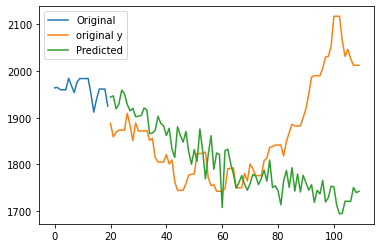

In [ ]:
test_num=69

element=forecast[test_num]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 3, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)


plt.plot(x_axis[0:20],testX_unscaled[test_num])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(x_axis[20:110],testY_unscaled[test_num])
plt.plot(x_axis[20:110],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()

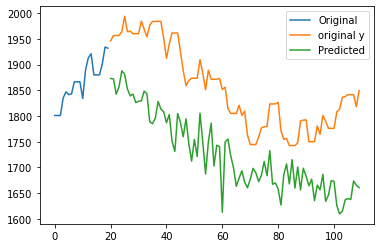

In [ ]:
test_num=43

element=forecast[test_num]
element= np. reshape(element, (element.shape[0], 1))
forecast_copies = np.repeat(element, 3, axis=1)
y_pred_future = scaler.inverse_transform(forecast_copies)
y_pred=[] 
for arr in y_pred_future:
  y_pred.append(arr[0])
y_pred= np.array(y_pred)


plt.plot(x_axis[0:20],testX_unscaled[test_num])#Traintemp and testtemp store actual values, not transformed. 
plt.plot(x_axis[20:110],testY_unscaled[test_num])
plt.plot(x_axis[20:110],y_pred)
plt.legend(["Original","original y","Predicted"])
plt.show()